# BelgiumTS - Belgian Traffic Sign Dataset 


## CNN

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import zipfile
local_zip = '/content/gdrive/MyDrive/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = '/content/imagedb_btsd/imagedb'
test_path = '/content/imagedb_btsd/imagedb_test'

In [ ]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 34

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/gdrive/MyDrive/Colab Notebooks/Belgian Traffic Sign Best Model/my_belgian_traffic_signs.hdf5'

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

#Scheduler
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           horizontal_flip=True, 
                                           rotation_range=15,
                                           zoom_range=0.1)

test_image_generator = ImageDataGenerator(rescale=rescale)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2457 images belonging to 34 classes.
Found 599 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_diagrams(history, h=20, w=8):
    epochs = len(history.history['loss'])
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(h, w))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_COLOR)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_data_gen, 
                    validation_data=val_data_gen, 
                    epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/250
39/39 [==============================] - 73s 1s/step - loss: 3.4345 - accuracy: 0.0924 - val_loss: 3.1906 - val_accuracy: 0.1235 - lr: 0.0010
Epoch 2/250
39/39 [==============================] - 47s 1s/step - loss: 3.2155 - accuracy: 0.0997 - val_loss: 3.1833 - val_accuracy: 0.0935 - lr: 0.0010
Epoch 3/250
39/39 [==============================] - 49s 1s/step - loss: 3.1846 - accuracy: 0.1184 - val_loss: 3.0988 - val_accuracy: 0.1269 - lr: 0.0010
Epoch 4/250
39/39 [==============================] - 49s 1s/step - loss: 2.3389 - accuracy: 0.2991 - val_loss: 1.8644 - val_accuracy: 0.3723 - lr: 0.0010
Epoch 5/250
39/39 [==============================] - 47s 1s/step - loss: 1.7963 - accuracy: 0.4208 - val_loss: 1.7532 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 6/250
39/39 [==============================] - 48s 1s/step - loss: 1.7761 - accuracy: 0.4550 - val_loss: 1.6319 - val_accuracy: 0.5042 - lr: 0.0010
Epoch 7/250
39/39 [==============================] - 48s 1s/step - loss: 1.5

In [ ]:
train_loss, train_acc = model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

39/39 - 33s - loss: 0.0168 - accuracy: 0.9943 - 33s/epoch - 857ms/step
Train accuracy: 99.43%


In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

34/34 - 9s - loss: 0.1270 - accuracy: 0.9828 - 9s/epoch - 258ms/step
Test accuracy: 98.28%


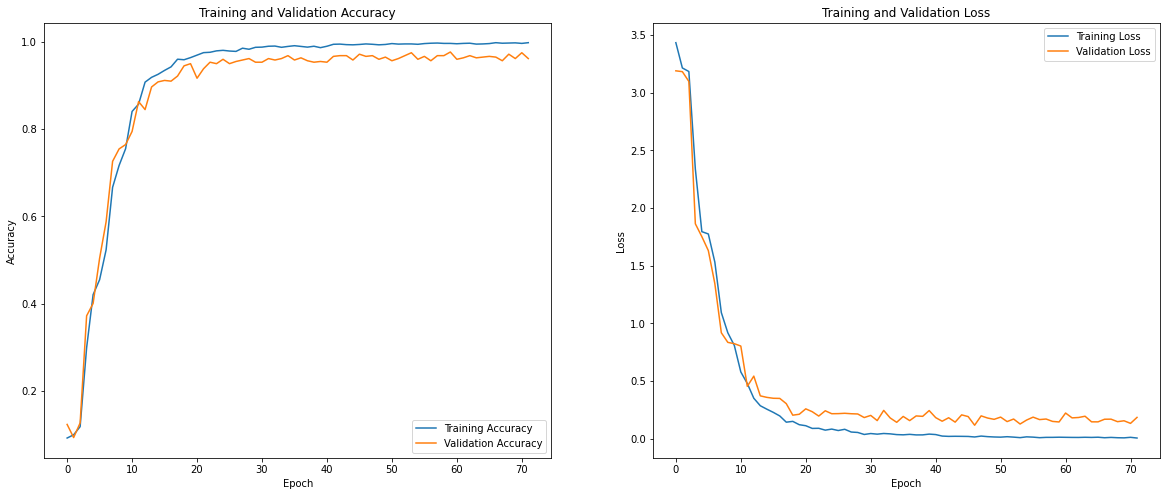

In [ ]:
plot_diagrams(history)

### Load the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.models import load_model

# Checkpoints
checkpoint_filepath = '/content/gdrive/MyDrive/Colab Notebooks/Belgian Traffic Sign Best Model/my_belgian_traffic_signs.hdf5'

best_model = load_model(checkpoint_filepath)

In [ ]:
import zipfile
local_zip = '/content/gdrive/MyDrive/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = '/content/imagedb_btsd/imagedb'
test_path = '/content/imagedb_btsd/imagedb_test'

In [ ]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 34

In [ ]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           horizontal_flip=True, 
                                           rotation_range=15,
                                           zoom_range=0.1)

test_image_generator = ImageDataGenerator(rescale=rescale)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2457 images belonging to 34 classes.
Found 599 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 123, 123, 64)      18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 121, 121, 64)      36928     
                                                        

In [ ]:
from keras.utils.layer_utils import count_params

trainable_params = count_params(best_model.trainable_weights)
non_trainable_params = count_params(best_model.non_trainable_weights)
print("Trainable params:", trainable_params)
print("Non trainable params:", non_trainable_params)

Trainable params: 2826530
Non trainable params: 0


In [ ]:
train_loss, train_acc = best_model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

39/39 - 39s - loss: 0.0119 - accuracy: 0.9959 - 39s/epoch - 997ms/step
Train accuracy: 99.59%


In [ ]:
test_loss, test_acc = best_model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

34/34 - 9s - loss: 0.1270 - accuracy: 0.9828 - 9s/epoch - 266ms/step
Test accuracy: 98.28%


## Pretrained model

### Train the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import zipfile
local_zip = '/content/gdrive/MyDrive/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = '/content/imagedb_btsd/imagedb'
test_path = '/content/imagedb_btsd/imagedb_test'

In [ ]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 34

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=25, verbose=1)

# Checkpoints
checkpoint_filepath = '/content/gdrive/MyDrive/Colab Notebooks/Belgian Traffic Sign Best Model Pretrained/my_belgian_traffic_signs.hdf5'

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

#Scheduler
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           horizontal_flip=True, 
                                           rotation_range=15,
                                           zoom_range=0.1,
                                           preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_image_generator = ImageDataGenerator(rescale=rescale, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2457 images belonging to 34 classes.
Found 599 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_diagrams(history, h=20, w=8):
    epochs = len(history.history['loss'])
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(h, w))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
# Create the base model from the pre-trained model ResNet50
base_model = tf.keras.applications.ResNet50(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_COLOR),
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
len(base_model.layers)

175

In [ ]:
for i in range(len(base_model.layers)-50): 
  base_model.layers[i].trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 131072)            0         
                                                                 
 dense_5 (Dense)             (None, 34)                4456482   
                                                                 
Total params: 28,044,194
Trainable params: 21,407,010
Non-trainable params: 6,637,184
_________________________________________________________________


In [ ]:
history = model.fit(x=train_data_gen, 
                    validation_data=val_data_gen, 
                    epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/250
39/39 [==============================] - 52s 1s/step - loss: 8.7443 - accuracy: 0.0769 - val_loss: 888.8450 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 2/250
39/39 [==============================] - 46s 1s/step - loss: 2.6918 - accuracy: 0.2487 - val_loss: 199.6938 - val_accuracy: 0.0417 - lr: 0.0010
Epoch 3/250
39/39 [==============================] - 47s 1s/step - loss: 1.9713 - accuracy: 0.4420 - val_loss: 64.3426 - val_accuracy: 0.0935 - lr: 0.0010
Epoch 4/250
39/39 [==============================] - 46s 1s/step - loss: 1.4463 - accuracy: 0.5832 - val_loss: 21.8827 - val_accuracy: 0.0935 - lr: 0.0010
Epoch 5/250
39/39 [==============================] - 46s 1s/step - loss: 1.1129 - accuracy: 0.6716 - val_loss: 5.0078 - val_accuracy: 0.3489 - lr: 0.0010
Epoch 6/250
39/39 [==============================] - 45s 1s/step - loss: 1.0133 - accuracy: 0.6956 - val_loss: 8.3178 - val_accuracy: 0.1937 - lr: 0.0010
Epoch 7/250
39/39 [==============================] - 47s 1s/step - los

In [ ]:
train_loss, train_acc = model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

39/39 - 34s - loss: 0.0218 - accuracy: 0.9939 - 34s/epoch - 877ms/step
Train accuracy: 99.39%


In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

34/34 - 10s - loss: 0.1284 - accuracy: 0.9814 - 10s/epoch - 282ms/step
Test accuracy: 98.14%


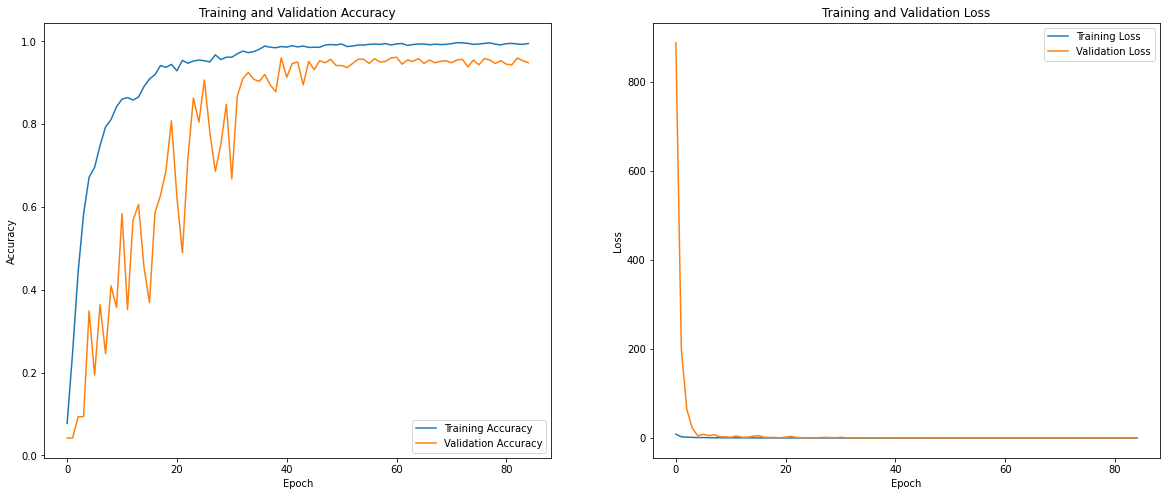

In [ ]:
plot_diagrams(history)

### Load the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from keras.models import load_model

# Checkpoints
checkpoint_filepath = '/content/gdrive/MyDrive/Colab Notebooks/Belgian Traffic Sign Best Model Pretrained/my_belgian_traffic_signs.hdf5'

best_model = load_model(checkpoint_filepath)

In [ ]:
import zipfile
local_zip = '/content/gdrive/MyDrive/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = '/content/imagedb_btsd/imagedb'
test_path = '/content/imagedb_btsd/imagedb_test'

In [ ]:
batch_size = 64
epochs = 250
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_COLOR = 3
num_of_classes = 34

In [ ]:
rescale = 1./255

train_image_generator = ImageDataGenerator(rescale=rescale, 
                                           validation_split=0.2,
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           horizontal_flip=True, 
                                           rotation_range=15,
                                           zoom_range=0.1,
                                           preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_image_generator = ImageDataGenerator(rescale=rescale, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

val_data_gen = train_image_generator.flow_from_directory(
        directory=train_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

test_data_gen = test_image_generator.flow_from_directory(
        directory=test_path, 
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2457 images belonging to 34 classes.
Found 599 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [ ]:
best_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 131072)            0         
                                                                 
 dense_5 (Dense)             (None, 34)                4456482   
                                                                 
Total params: 28,044,194
Trainable params: 21,407,010
Non-trainable params: 6,637,184
_________________________________________________________________


In [ ]:
from keras.utils.layer_utils import count_params

trainable_params = count_params(best_model.trainable_weights)
non_trainable_params = count_params(best_model.non_trainable_weights)
print("Trainable params:", trainable_params)
print("Non trainable params:", non_trainable_params)

Trainable params: 21407010
Non trainable params: 6637184


In [ ]:
train_loss, train_acc = best_model.evaluate(train_data_gen, verbose=2)
print("Train accuracy: " + "{:.2f}".format(train_acc*100) + "%")

39/39 - 35s - loss: 0.0129 - accuracy: 0.9963 - 35s/epoch - 909ms/step
Train accuracy: 99.63%


In [ ]:
test_loss, test_acc = best_model.evaluate(test_data_gen, verbose=2)
print("Test accuracy: " + "{:.2f}".format(test_acc*100) + "%")

34/34 - 9s - loss: 0.1284 - accuracy: 0.9814 - 9s/epoch - 278ms/step
Test accuracy: 98.14%
